# Grassmann Manifold

Author: Ketson R. M. dos Santos,  
Date: June 3rd, 2020   

This example shows how to use the UQpy Grassmann class to
* use the logarithimic map;
* use the exponential map;

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the Grassmann class from UQpy implemented in the DimensionReduction module.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from UQpy.DimensionReduction import Grassmann

Generate four random matrices with reduced rank corresponding to the different samples. The samples are stored in `matrices`.

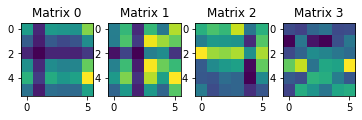

In [2]:
D1 = 6 
r0 = 2  # rank sample 0
r1 = 3  # rank sample 1
r2 = 4  # rank sample 2
r3 = 3  # rank sample 2

np.random.seed(1111) # For reproducibility.
# Solutions: original space.
Sol0 = np.dot(np.random.rand(D1, r0),np.random.rand(r0, D1))
Sol1 = np.dot(np.random.rand(D1, r1),np.random.rand(r1, D1))
Sol2 = np.dot(np.random.rand(D1, r2),np.random.rand(r2, D1))
Sol3 = np.dot(np.random.rand(D1, r3),np.random.rand(r3, D1))

# Creating a list of matrices.
matrices = [Sol0, Sol1, Sol2, Sol3]

# Plot the matrices
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(Sol0)
ax2.title.set_text('Matrix 1')
ax2.imshow(Sol1)
ax3.title.set_text('Matrix 2')
ax3.imshow(Sol2)
ax4.title.set_text('Matrix 3')
ax4.imshow(Sol3)
plt.show()

Instatiate the UQpy class Grassmann.

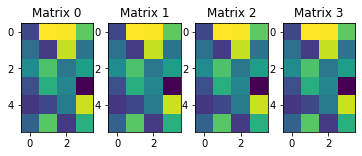

In [3]:
Gr = Grassmann()
Gr.manifold(p="max", samples=matrices)

# Plot the points on the Grassmann manifold defined by the left singular eigenvectors.
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(Gr.psi[0])
ax2.title.set_text('Matrix 1')
ax2.imshow(Gr.psi[0])
ax3.title.set_text('Matrix 2')
ax3.imshow(Gr.psi[0])
ax4.title.set_text('Matrix 3')
ax4.imshow(Gr.psi[0])
plt.show()

Project $\Psi$, the left singular eigenvectors, on the tangent space centered at $\Psi_0$.

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[-0.00289972  0.02940501 -0.06692524 -0.00799253]
 [ 0.00455712 -0.26515178  0.67732875  0.22752485]
 [ 0.09689065 -0.51255794  1.00804947 -0.19438032]
 [-0.00312777  0.16973559 -0.43286845 -0.14413289]
 [ 0.00987154  0.11548807 -0.33556779 -0.18446793]
 [-0.04450886 -0.06531477  0.32292567  0.38460091]]
[[ 0.01257495  0.03558027 -0.02763244 -0.05552352]
 [-0.09156837 -0.2842928   0.18309812  0.52030722]
 [-0.2660385  -0.69864148  0.62348617  0.92567249]
 [ 0.05882985  0.18234499 -0.11785367 -0.33288055]
 [ 0.0278989   0.1037574  -0.04346657 -0.23740691]
 [ 0.02356688  0.00720386 -0.09453735  0.16967396]]
[[ 0.017117    0.04079387 -0.01498294 -0.01085114]
 [-0.19468092 -0.65420867  0.38068039  0.09551603]
 [-0.21178723 -0.09637538 -0.26598478  0.19415025]
 [ 0.12423069  0.4159958  -0.24129578 -0.06116684]
 [ 0.10694321  0.44219993 -0.30066607 -0.04032223]
 [-0.1332     -0.76637848  0.61280029  0

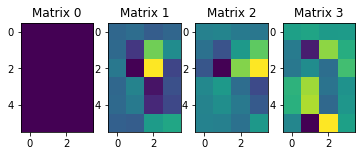

In [4]:
points_tangent = Gr.log_map(points_grassmann=Gr.psi, ref=Gr.psi[0])

print(points_tangent[0])
print(points_tangent[1])
print(points_tangent[2])
print(points_tangent[3])

# Plot the matrices
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(points_tangent[0])
ax2.title.set_text('Matrix 1')
ax2.imshow(points_tangent[1])
ax3.title.set_text('Matrix 2')
ax3.imshow(points_tangent[2])
ax4.title.set_text('Matrix 3')
ax4.imshow(points_tangent[3])
plt.show()

Map the points back to the Grassmann manifold.

[[-0.49845212  0.59107959  0.58119841  0.24899708]
 [-0.28055911 -0.55018022  0.47115229 -0.25725086]
 [-0.11883656  0.2041979  -0.24243923 -0.01576811]
 [-0.45537621  0.08148936 -0.16132051 -0.79115855]
 [-0.57337871 -0.494697   -0.21878947  0.4879397 ]
 [-0.35011328  0.23423113 -0.55457553  0.08692993]]
[[-0.50136445  0.70841202  0.28453725  0.1547646 ]
 [-0.31591289 -0.47532559  0.3964615  -0.0761924 ]
 [-0.02674355 -0.27249325  0.68829029 -0.21081997]
 [-0.45755921  0.10336113 -0.21101076 -0.79691514]
 [-0.54998007 -0.43231454 -0.46184597  0.2582154 ]
 [-0.36915987 -0.01964771  0.17402895  0.47333776]]
[[-0.44981508  0.72334264  0.47047454  0.05888228]
 [-0.2668961  -0.55288199  0.41139989 -0.12722611]
 [-0.33318319 -0.35124003  0.26526139  0.69572981]
 [-0.52845575 -0.10239982  0.01571595 -0.57381085]
 [-0.45092325 -0.13003426 -0.47480795 -0.13642154]
 [-0.36445106  0.14259292 -0.55977732  0.38527484]]
[[-0.49807161  0.58752321  0.58579857  0.24810129]
 [-0.30873379 -0.47464828  0

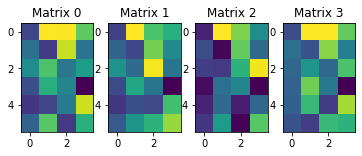

In [5]:
points_grassmann = Gr.exp_map(points_tangent=points_tangent, ref=Gr.psi[0])

print(points_grassmann[0])
print(points_grassmann[1])
print(points_grassmann[2])
print(points_grassmann[3])

# Plot the matrices
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.title.set_text('Matrix 0')
ax1.imshow(points_grassmann[0])
ax2.title.set_text('Matrix 1')
ax2.imshow(points_grassmann[1])
ax3.title.set_text('Matrix 2')
ax3.imshow(points_grassmann[2])
ax4.title.set_text('Matrix 3')
ax4.imshow(points_grassmann[3])
plt.show()